In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def data_clean(link,skip_rows):
    
    df=pd.read_csv(link,skiprows=skip_rows)
    #df=pd.read_json(link)
    #df=pd.read_excel(link)
    #df=pd.read_html(link)
    df.dropna(how='all',inplace=True)
    df.drop_duplicates(inplace=True)
    return df


In [3]:
df=data_clean(r"C:\Users\Osamah\code python\Data Analysis\My_Orders.csv",0)

In [4]:
#for see all the data and some fun
df.describe()

,Order ID,Lat,Lng,Phone Number,Quantity,Unit Price,Discount,Total price,Cost
count,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,30.461665,11.339318,5.498561e+09,1.936750,609.292000,61.448600,1181.035250,1119.586650
std,5773.647028,8.126746,53.194139,2.889298e+08,2.288736,617.976051,142.181639,2272.317786,2155.054747
min,1.000000,18.231100,-115.149200,5.000075e+09,1.000000,29.000000,0.000000,29.000000,26.000000
25%,5000.750000,24.453900,2.352200,5.248352e+09,1.000000,179.000000,8.000000,229.000000,206.000000
50%,10000.500000,27.180900,37.134300,5.498545e+09,1.000000,399.000000,22.000000,499.000000,489.000000
75%,15000.250000,36.202100,42.500400,5.749508e+09,2.000000,899.000000,61.250000,1199.000000,1151.000000
max,20000.000000,48.856600,56.324200,5.999985e+09,13.000000,3999.000000,3999.000000,45487.000000,43668.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              20000 non-null  float64
 1   Order Date            20000 non-null  object 
 2   Country               20000 non-null  object 
 3   City                  20000 non-null  object 
 4   Branch                20000 non-null  object 
 5   Branch Name           20000 non-null  object 
 6   Lat                   20000 non-null  float64
 7   Lng                   20000 non-null  float64
 8   Customer First Name   20000 non-null  object 
 9   Customer Last Name    20000 non-null  object 
 10  Customer full Name    20000 non-null  object 
 11  Email                 20000 non-null  object 
 12  Phone Number          20000 non-null  int64  
 13  Category              20000 non-null  object 
 14  Sub Category          20000 non-null  object 
 15  Item               

In [37]:
city_Qu_Total=df.groupby(['City'])['Quantity'].sum()
city_Qu_Total

City
Abu Dhabi     4555.0
Aleppo        2138.0
Aseer         1653.0
Asyut         2004.0
Cairo         2653.0
Casablanca    1179.0
Damascus      1300.0
Dammam         985.0
Dubai          840.0
Fujairah       254.0
Homs          1525.0
Jeddah        6167.0
Las Vegas     2505.0
New York      4209.0
Paris         2201.0
Riyadh        2989.0
Washington    1578.0
Name: Quantity, dtype: float64

In [29]:
cat_Qu_Total=df.groupby('Category')['Quantity'].sum()
cat_Qu_Total

Category
Digital Camera     3629.0
Fitness Tracker    3731.0
Gaming Console     3815.0
Headphones         3797.0
Laptop             4484.0
Smart Speaker      3687.0
Smartphone         4003.0
Smartwatch         3594.0
Tablet             4169.0
VR Headset         3826.0
Name: Quantity, dtype: float64

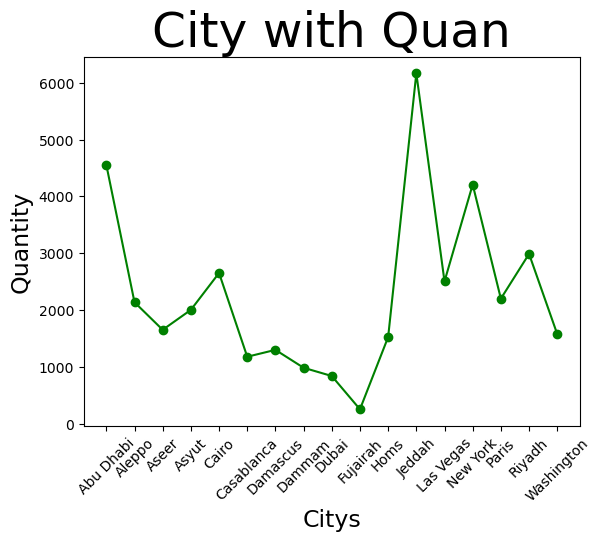

In [87]:
plt.plot(city_Qu_Total,'go-')
plt.title('City with Quan',fontsize=35)
plt.xlabel('Citys',fontsize=17)
plt.ylabel('Quantity',fontsize=17)
plt.xticks(rotation=45)
plt.show()

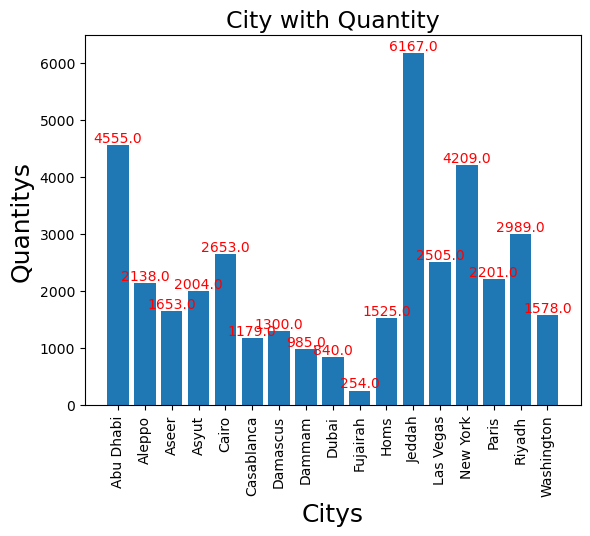

In [101]:
plt.bar(city_Qu_Total.index,city_Qu_Total.values)
plt.title('City with Quantity',fontsize=17)
plt.xlabel('Citys',fontsize=18)
plt.ylabel('Quantitys',fontsize=18)
plt.xticks(rotation=90)
for ind,val in enumerate(city_Qu_Total):
    plt.text(ind,val,val,ha='center',va='bottom',color='r')
plt.show()

In [103]:
status=df['Status'].value_counts()
status

Status
True     14013
False     5987
Name: count, dtype: int64

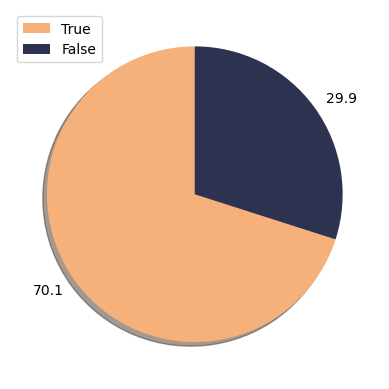

In [153]:
data=status.values / status.values.sum()*100
plt.pie(status,startangle=90,labels=data.round(1),colors=['#F6B17A','#2D3250'],shadow=True)
plt.legend(status.index,loc='upper left')
plt.show()